In [1]:
from HelperFunctions import *
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
pval=5
resultsfull = pickle.load(open('SPOresultsAllVars.pkl','rb')).unstack().stack(0).droplevel(['grid_dim'])
results=resultsfull[(resultsfull.reset_index()['p']==pval).values].droplevel(['p']).copy()

In [3]:
results['SPO diff'] = 100*(results['SPO_loss_SGD'] - results['SPO_loss_direct'])/results['SPO_loss_direct']
results['SPO+ diff'] = 100*(results['SPO_plus_loss_SGD'] - results['SPO_plus_loss_direct'])/results['SPO_plus_loss_direct']

In [4]:
lossdiffs = results[['SPO diff','SPO+ diff']]

In [5]:
lossmeans = lossdiffs.groupby('n').mean()
lossSD = lossdiffs.groupby('n').std()
lossLB = lossmeans - 1.96*lossSD/np.sqrt(30) #95% confidence interval for the mean
lossUB = lossmeans + 1.96*lossSD/np.sqrt(30) #95% confidence interval for the mean

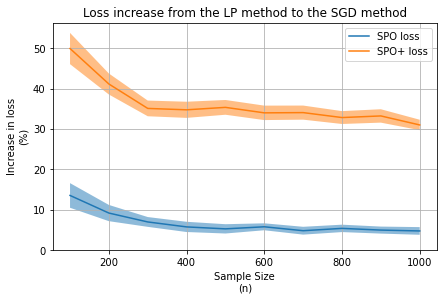

In [6]:
plt.plot(lossmeans.index,lossmeans['SPO diff'], label='SPO loss')
plt.fill_between(lossmeans.index,lossLB['SPO diff'],lossUB['SPO diff'], alpha=0.5)

plt.plot(lossmeans.index,lossmeans['SPO+ diff'], label='SPO+ loss')
plt.fill_between(lossmeans.index,lossLB['SPO+ diff'],lossUB['SPO+ diff'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Increase in loss\n(%)')

plt.title('Loss increase from the LP method to the SGD method')
plt.tight_layout(pad=0.1)
plt.grid()

plt.savefig('LossComparison.png')

In [7]:
runtimes = results[['direct_runtime','SGD_runtime']]

In [8]:
runtimemeans = runtimes.groupby('n').mean()
runtimeSD = runtimes.groupby('n').std()
runtimeUB=runtimes.groupby('n').quantile(0.975)
runtimeLB=runtimes.groupby('n').quantile(0.025)
#runtimeLB = runtimemeans - 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean
#runtimeUB = runtimemeans + 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean

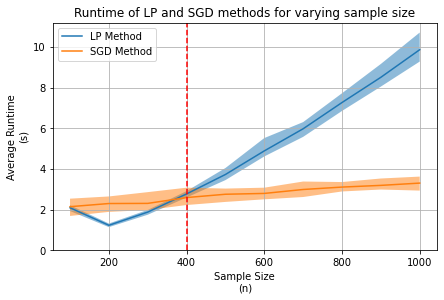

In [9]:
plt.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
plt.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

plt.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
plt.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Average Runtime\n(s)')
plt.title('Runtime of LP and SGD methods for varying sample size')
plt.tight_layout(pad=0.1)
plt.grid()
plt.axvline(400,c='r',linestyle='--')
plt.savefig('Runtime.png')